In [19]:
#data 
import pandas as pd
import seaborn as sns
import numpy as np
import os
import collections
import sys
import glob
import random
import cv2
import tensorflow as tf
import string

#keras application
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

from keras.models import Model, load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

#sklearn for evalution model
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Constants
TEST_SIZE = 0.02
HEIGHT = 224
WIDTH = 224
CHANNELS = 3
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16
SHAPE = (HEIGHT, WIDTH, CHANNELS)

from google.colab import drive
drive.mount('/content/drive')
# Folders
DATA_DIR = '/content/drive/MyDrive/BISINDO/*/*.jpg'

Mounted at /content/drive


# Preprocessing Data

In [ ]:
data = glob.glob(DATA_DIR)
data.sort()
X_train = []
X_test = []
y_train = []
y_test = []

#membagi data train dan data validation (dimana file dengan akhirnya (3) dijadikan data validation dan sisanya dijadikan data traning)
for d in data:
  labels = d.split('/')[-2]
  if int(d.split('(')[1].split(')')[0]) == 3:
    X_test.append(d)
    y_test.append(labels)
  else:
    X_train.append(d)
    y_train.append(labels)

data_train = pd.DataFrame({'namafile' : X_train, 'label' : y_train})
data_test = pd.DataFrame({'namafile' : X_test, 'label' : y_test})

In [ ]:
data_train

,namafile,label
0,/content/drive/MyDrive/BISINDO/A/body dot (1).jpg,A
1,/content/drive/MyDrive/BISINDO/A/body dot (2).jpg,A
2,/content/drive/MyDrive/BISINDO/A/body dot (4).jpg,A
3,/content/drive/MyDrive/BISINDO/A/body white (1...,A
4,/content/drive/MyDrive/BISINDO/A/body white (2...,A
...,...,...
229,/content/drive/MyDrive/BISINDO/Z/body white (2...,Z
230,/content/drive/MyDrive/BISINDO/Z/body white (4...,Z
231,/content/drive/MyDrive/BISINDO/Z/wall white (1...,Z
232,/content/drive/MyDrive/BISINDO/Z/wall white (2...,Z


In [ ]:
#Preprocessing menggunakan Image data generator dan flow from directory untuk menentukan data training dan data validasi/data test
train_datagen = ImageDataGenerator(rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        #shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
        #fill_mode='nearest',
        #validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_dataframe(
    data_train,
    x_col='namafile',
    y_col='label',
    target_size=(HEIGHT, WIDTH),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='sparse')
    #subset='training') # set as training data

validation_generator = train_datagen.flow_from_dataframe(
    data_test, # same directory as training data
    x_col='namafile',
    y_col='label',
    target_size=(HEIGHT, WIDTH),
    batch_size=VALID_BATCH_SIZE,
    class_mode='sparse')
    #subset='validation') # set as validation data

Found 234 validated image filenames belonging to 26 classes.
Found 78 validated image filenames belonging to 26 classes.


In [ ]:
print(train_generator.classes)
train_generator.filepaths

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25]


['/content/drive/MyDrive/BISINDO/A/body dot (1).jpg',
 '/content/drive/MyDrive/BISINDO/A/body dot (2).jpg',
 '/content/drive/MyDrive/BISINDO/A/body dot (4).jpg',
 '/content/drive/MyDrive/BISINDO/A/body white (1).jpg',
 '/content/drive/MyDrive/BISINDO/A/body white (2).jpg',
 '/content/drive/MyDrive/BISINDO/A/body white (4).jpg',
 '/content/drive/MyDrive/BISINDO/A/wall white (1).jpg',
 '/content/drive/MyDrive/BISINDO/A/wall white (2).jpg',
 '/content/drive/MyDrive/BISINDO/A/wall white (4).jpg',
 '/content/drive/MyDrive/BISINDO/B/body dot (1).jpg',
 '/content/drive/MyDrive/BISINDO/B/body dot (2).jpg',
 '/content/drive/MyDrive/BISINDO/B/body dot (4).jpg',
 '/content/drive/MyDrive/BISINDO/B/body white (1).jpg',
 '/content/drive/MyDrive/BISINDO/B/body white (2).jpg',
 '/content/drive/MyDrive/BISINDO/B/body white (4).jpg',
 '/content/drive/MyDrive/BISINDO/B/wall white (1).jpg',
 '/content/drive/MyDrive/BISINDO/B/wall white (2).jpg',
 '/content/drive/MyDrive/BISINDO/B/wall white (4).jpg',
 '/c

## Modelling

In [ ]:
#Building Model
input_shape=(HEIGHT, WIDTH, 3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') #hasil dari model dibagi menjadi 26 classes
])

In [ ]:
model.compile(optimizer ='adam', 
              loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 16)      

In [ ]:
#menentukan callback

callback = EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
)

In [18]:
history = model.fit(
        train_generator,
        epochs=100,
        #steps_per_epoch=50,
        callbacks=callback,
        validation_data=validation_generator)

Epoch 1/100
15/15 [==============================] - 22s 1s/step - loss: 3.2613 - accuracy: 0.0128 - val_loss: 3.2580 - val_accuracy: 0.0385
Epoch 2/100
15/15 [==============================] - 20s 1s/step - loss: 3.2588 - accuracy: 0.0214 - val_loss: 3.2578 - val_accuracy: 0.0256
Epoch 3/100
15/15 [==============================] - 20s 1s/step - loss: 3.2588 - accuracy: 0.0214 - val_loss: 3.2548 - val_accuracy: 0.0641
Epoch 4/100
15/15 [==============================] - 20s 1s/step - loss: 3.2588 - accuracy: 0.0342 - val_loss: 3.2565 - val_accuracy: 0.1154
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 3.2571 - accuracy: 0.0470 - val_loss: 3.2551 - val_accuracy: 0.0513
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 3.2483 - accuracy: 0.0513 - val_loss: 3.2393 - val_accuracy: 0.0513
Epoch 7/100
15/15 [==============================] - 20s 1s/step - loss: 3.2425 - accuracy: 0.0556 - val_loss: 3.2328 - val_accuracy: 0.0385
Epoch 8/100
1

In [20]:
model.save("model_8.h5")

## Evaluation

In [21]:
from matplotlib import pyplot as plt
print(history.history.keys())
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


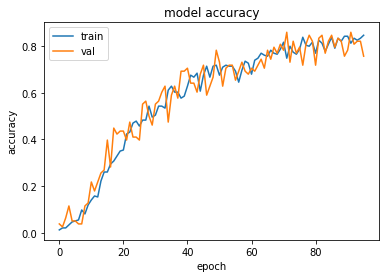

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

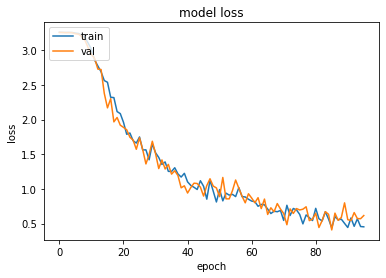

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Testing Model

In [24]:
#Testing Model
filename = []
y_pred = []
labels = list(string.ascii_uppercase)

for fn in X_test:
    nama = os.path.basename(fn)
    filename.append(nama)
    #img = cv2.imread(fn) 
    img = image.load_img(fn, target_size=(HEIGHT, WIDTH))
    #x = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=TEST_BATCH_SIZE)
    #print(classes)
    y_classes = labels[classes.argmax(axis=-1)[0]]
    y_pred.append(y_classes)

In [25]:
print(classification_report(y_test,y_pred)) # Print summary report
#print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred)) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         3
           C       0.60      1.00      0.75         3
           D       1.00      1.00      1.00         3
           E       1.00      1.00      1.00         3
           F       1.00      1.00      1.00         3
           G       1.00      1.00      1.00         3
           H       1.00      1.00      1.00         3
           I       1.00      1.00      1.00         3
           J       1.00      1.00      1.00         3
           K       1.00      1.00      1.00         3
           L       1.00      1.00      1.00         3
           M       1.00      1.00      1.00         3
           N       1.00      1.00      1.00         3
           O       1.00      1.00      1.00         3
           P       1.00      1.00      1.00         3
           Q       1.00      0.67      0.80         3
           R       1.00    